### 'Facet' Plotting of Spectral Indices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from pylab import savefig

%matplotlib inline

In [2]:
%run ../lib/spectral_lib.py
%run ../data/raw_data.py

In [3]:
# Load all data in separate dataframes.

df1 = pd.DataFrame({'date': date_1,
                   'ndvi': ndvi_1,        # raw ndvi 
                   'ndvic': ndvic_1,      # corrected ndvi
                   'gndvi': gndvi_1,      # gndvi (green ndvi)
                   'ndre' : ndre_1,       # ndre (normative difference red-edge)
                   'psps': psps,          # lbs sugar per section
                   'treatment': treatment # treatment type
                  })
df2 = pd.DataFrame({'date': date_2,
                   'ndvi': ndvi_2, 
                   'ndvic': ndvic_2,
                   'gndvi': gndvi_2,
                   'ndre' : ndre_2,
                   'psps': psps,
                   'treatment': treatment
                  })
df3 = pd.DataFrame({'date': date_3,
                   'ndvi': ndvi_3,
                   'ndvic': ndvic_3,
                   'gndvi': gndvi_3,
                   'ndre' : ndre_3,
                   'psps': psps,
                   'treatment': treatment
                  })
df4 = pd.DataFrame({'date': date_4, # this is the winner!
                   'ndvi': ndvi_4,
                   'ndvic': ndvic_4,
                   'gndvi': gndvi_4,
                   'ndre' : ndre_4,
                   'psps': psps,
                   'treatment': treatment
                  })
df5 = pd.DataFrame({'date': date_5,
                   'ndvi': ndvi_5,
                   'ndvic': ndvic_5,
                   'gndvi': gndvi_5,
                   'ndre' : ndre_5,
                   'psps': psps,
                   'treatment': treatment
                  })
df6 = pd.DataFrame({'date': date_6,
                   'ndvi': ndvi_6,
                   'ndvic': ndvic_6,
                   'gndvi': gndvi_6,
                   'ndre' : ndre_6,
                   'psps': psps,
                   'treatment': treatment
                  })

In [4]:
# Create dataframes will all data, with the first 3 dates and with the last 3 dates.
frames = [df1, df2, df3, df4, df5, df6]
frames1to3 = [df1, df2, df3]
frames4to6 = [df4, df5, df6]
ndvi_winning_frame = df4

all_spectral_data = pd.concat(frames)
spectral_data_one2three = pd.concat(frames1to3)
spectral_data_four2six = pd.concat(frames4to6)

all_spectral_data.tail()

,date,gndvi,ndre,ndvi,ndvic,psps,treatment
25,11/13/2017,0.54,0.57,0.67,0.70,232.71,1
26,11/13/2017,0.59,0.63,0.76,0.76,563.88,5
27,11/13/2017,0.54,0.55,0.67,0.67,316.98,2
28,11/13/2017,0.54,0.55,0.71,0.71,453.51,3
29,11/13/2017,0.55,0.57,0.72,0.72,446.71,4


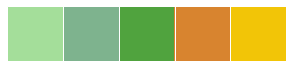

In [5]:
treatmentui = ['#A4DE9A', '#7EB38E', '#50A33E', '#D8842F', '#F2C507']
sns.palplot(sns.color_palette(treatmentui))

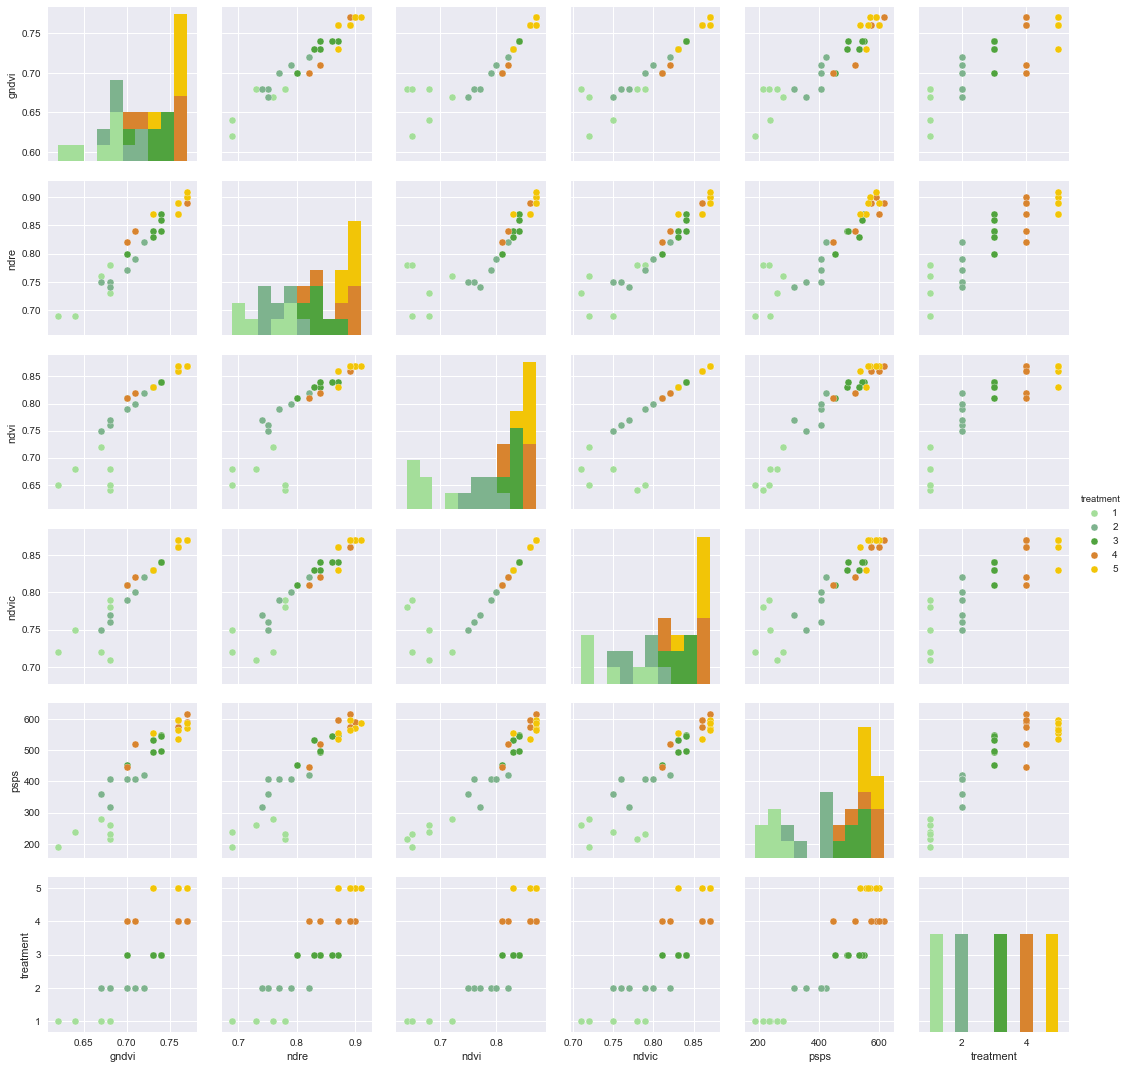

In [10]:
sns.pairplot(ndvi_winning_frame, hue='treatment', size=2.5, palette=treatmentui);

In [7]:
# Map a text description to a treatment number.
treatment_dict = {1:'0 lbs N', 2:'40 lbs N', 3:'80 lbs N', 4:'120 lbs N', 5: '180 lbs N'}

# Add a new column that provides a text description of treatment.
all_spectral_data['treatment_txt'] = all_spectral_data.apply(
    lambda row: treatment_dict[row['treatment']], axis=1) 

# Add a new column for the text description.
spectral_data_one2three['treatment_txt'] = spectral_data_one2three.apply(
    lambda row: treatment_dict[row['treatment']], axis=1)

# Add a new column for the text description.
spectral_data_four2six['treatment_txt'] = spectral_data_four2six.apply(
    lambda row: treatment_dict[row['treatment']], axis=1) 

In [7]:
#current_palette = sns.color_palette()

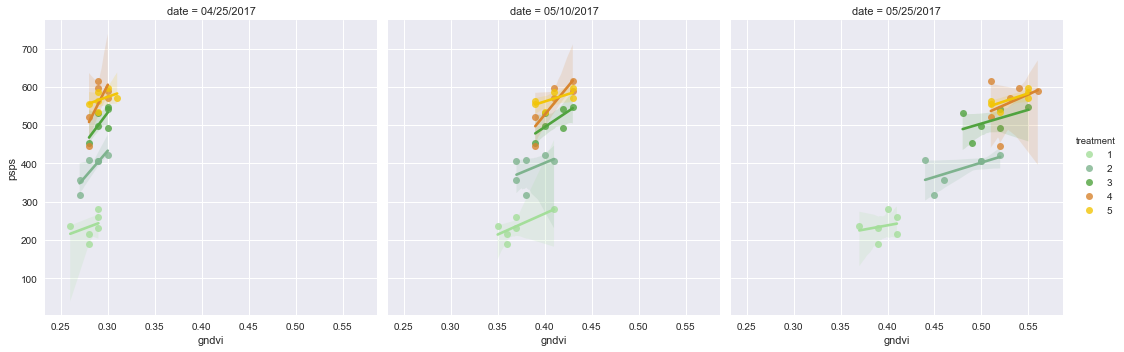

In [9]:
# Plot NDVI versus PSPS (Pounds Sugar per Section) for the first three dates.
sns_plot_one2three = sns.lmplot(
                            'gndvi', 
                            'psps', data=spectral_data_one2three, 
                                    hue="treatment", col="date", fit_reg=True, truncate=True, palette=treatmentui)

In [55]:
#sns_plot_one2three.savefig('../readme_resources/img/gndvi/gndvi_one2three.png', dpi=300)

In [44]:
number_to_text = {1:'0 lbs N', 2:'40 lbs N', 3:'60 lbs N', 4:'80 lbs N', 5:'120 lbs N'}
ndvi_winning_frame['treatment_txt'] = [number_to_text[i] for i in ndvi_winning_frame['treatment'] ]

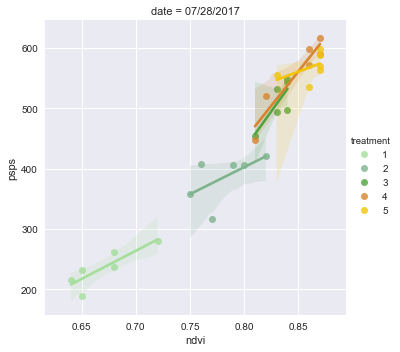

In [12]:
# Plot NDVI versus PSPS (Pounds Sugar per Section) for THE WINNER!
sns_plot_ndvi_winner = sns.lmplot(
                            'ndvi', 
                            'psps', data=ndvi_winning_frame, 
                                    hue="treatment", col="date", fit_reg=True, truncate=True, palette=treatmentui)

In [33]:
#sns_plot_ndvi_winner.savefig('../readme_resources/img/ndvi/ndvi_winner.png', dpi=300)

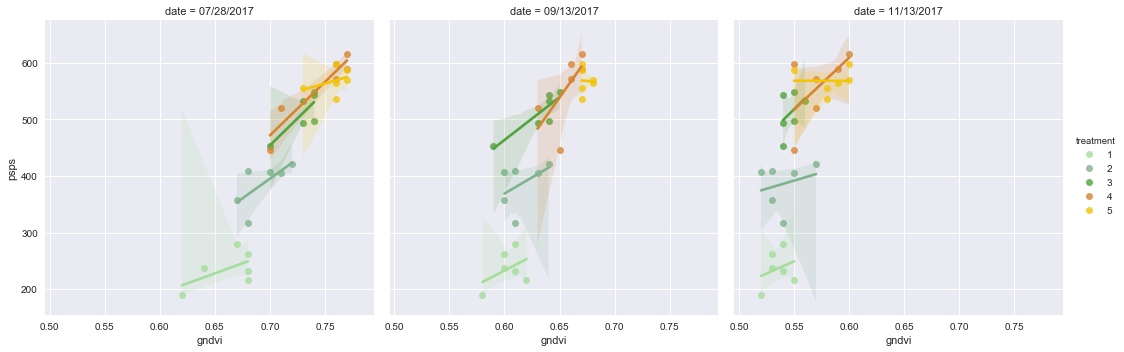

In [56]:
# Plot NDVI versus PSPS (Pounds Sugar per Section) for the second three dates.
sns_plot_four2six = sns.lmplot(
                            'gndvi', 
                            'psps', data=spectral_data_four2six, 
                                    hue="treatment", col="date", fit_reg=True, truncate=True, palette=treatmentui)

In [57]:
#sns_plot_four2six.savefig('../readme_resources/img/gndvi/gndvi_four2six.png', dpi=300)

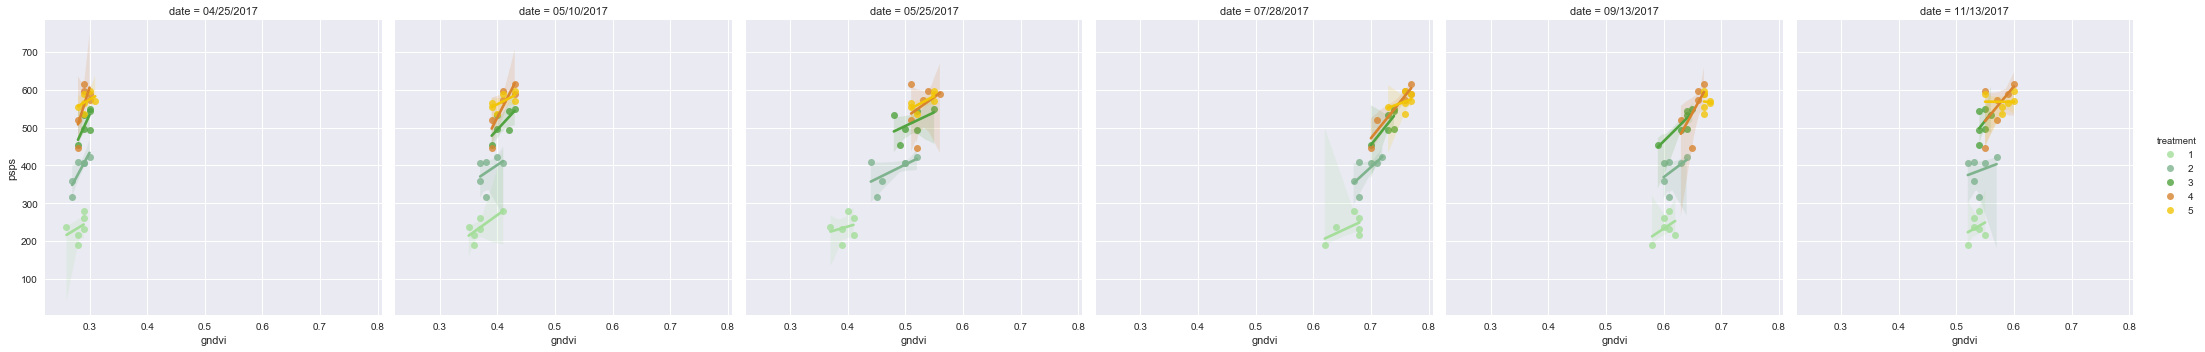

In [58]:
# Plot NDVI versus PSPS (Pounds Sugar per Section) for the first three dates.
sns_plot_all_spectral_data = sns.lmplot(
                            'gndvi', 
                            'psps', data=all_spectral_data, 
                                    hue="treatment", col="date", fit_reg=True, truncate=True, palette=treatmentui)

In [59]:
#sns_plot_all_spectral_data.savefig('../readme_resources/img/gndvi/gndvi_all_spectral_data.png', dpi=300)

In [11]:
all_spectral_data.head()

,date,gndvi,ndre,ndvi,ndvic,psps,treatment,treatment_txt
0,04/25/2017,0.30,0.38,0.28,0.46,493.67,3,60 lbs N
1,04/25/2017,0.29,0.38,0.27,0.42,261.52,1,0 lbs N
2,04/25/2017,0.31,0.39,0.28,0.47,570.20,5,120 lbs N
3,04/25/2017,0.30,0.38,0.27,0.47,421.63,2,40 lbs N
4,04/25/2017,0.30,0.36,0.29,0.47,589.87,4,80 lbs N
